![](https://upload.wikimedia.org/wikipedia/commons/2/29/Vinted_logo.png)

## A/B Fashion @ Vinted

[Vinted](https://www.vinted.fr/) is a French e-commerce platform which allow to sell your old clothes. Over the years the company has grown a lot and is now making around $40 Millions in revenue and is value $4.5 billion dollars. 

Conversion for e-commerce is extremely important. Vinted's team would like to optimize their website. Their designer and marketing team selected two versions they would like to test on their website. Here they are: 

## Feature A 

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/Vinted_Feature_A.png)

## Feature B 

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/Vinted_Feature_B.png)

They asked you to run an A/B test to determine which version would provide more conversions. They also provided you with a file called `vinted_website_optimization.csv`. 

## Step 1 - Import Libraries 

For this project, we will be using: 

* `pandas as pd`
* `numpy as np`
* `seaborn as sns`
* `matplotlib.pyplot as plt`

In [ ]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

## Step 2 - Import dataset 

As stated above, we need to import `vinted_website_optimization.csv` that holds the results of our A/B test 

In [ ]:
df = pd.read_csv("src/vinted_website_optimization.csv")
df.head()

,Feature_A,Feature_B
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


## Step 3 - EDA 

Now, let's do a little bit of Exploratory Data Analysis. Let's first see the proportion of conversion for Feature A as well as Feature B 

In [ ]:
df.mean()

Feature_A    0.086
Feature_B    0.126
dtype: float64

Then visualize both feature using `pandas` and the `plot` function. We will need to build confidence intervals with 95% confidence level.

<AxesSubplot:>

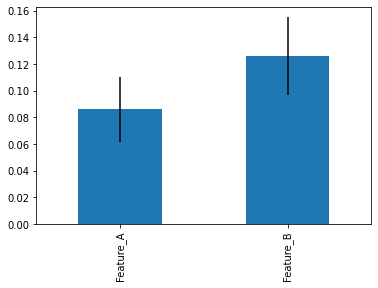

In [ ]:
t = 1.96
n = len(df)
E = t*df.std()/np.sqrt(n)

df.mean().plot(kind="bar", yerr=E)

## Step 4 - Test 

Since our DataFrame is made differently we won't need to do much manipulations. However we do need to apply the following formula:

$$Z-Score = \frac{\mu_B - \mu_A}{\sqrt{\frac{\sigma_B^2}{n_B}+ \frac{\sigma_A^2}{n_A}}}$$

In [ ]:
mean_a = df['Feature_A'].mean()
mean_b = df['Feature_B'].mean()

std_a = df['Feature_A'].std()
std_b = df['Feature_B'].std()


n_a = len(df)
n_b = len(df)

z_score = (mean_b - mean_a) / np.sqrt(std_a**2/n_a + std_b**2/n_b)
z_score

2.056800150160431

In [ ]:
## Step 5 - Set $\alpha$

Let's now set $\alpha$, after checking with Airbnb's team, they've settled for 95% confidence level

In [ ]:
alpha=0.05

## Step 6 - Compare p-value to $\alpha$ 

Finally, we need to compare our p-value to $\alpha$, to do so, we'll be using `ztest` from `statsmodels`: 

* [`ztest`](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [ ]:
from statsmodels.stats.weightstats import ztest
z_score, p_value = ztest(df['Feature_B'], df['Feature_A'], alternative='larger', value=0)

print("Z_score value is: {}".format(z_score))
print("p-value is: {}".format(p_value))

if p_value < alpha:
    print("We can reject the Null Hypothesis")
else:
    print("We can't reject the Null hypothesis")

Z_score value is: 2.056800150160431
p-value is: 0.019852726822912285
We can reject the Null Hypothesis


## Step 7 (Optional) - Visualize probability

Finally, one cool thing could be to visualize your Z-test! One thing that we could use is `matplotlib.pyplot` library with `seaborn`. Check out this code and try to understand the results. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


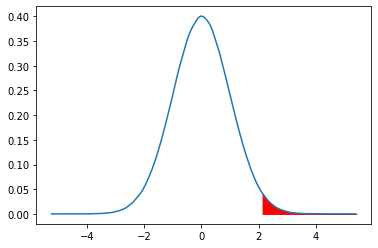

In [ ]:
### Visualize area under curve
import seaborn as sns 

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()